### **Bike Sharing**

[Sumber data Capital Bikehare DC](https://capitalbikeshare.com/system-data) 

### **Contents**

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

****

### **Business Problem Understanding**

**Context**

Capital Bikehare adalah perusahaan penyewaan sepeda yang merupakan generasi baru dari penyewaan sepeda tradisional yang seluruh prosesnya, mulai dari keanggotaan, penyewaan, hingga pengembalian, telah menjadi otomatis. Melalui sistem ini, pengguna dapat dengan mudah menyewa sepeda dari lokasi tertentu dan kembali lagi di lokasi lain. Saat ini, terdapat sekitar lebih dari 500 program berbagi sepeda di seluruh dunia yang terdiri dari lebih dari 500 ribu sepeda. Saat ini, minat yang besar terhadap sistem ini muncul karena perannya yang penting dalam masalah lalu lintas, lingkungan, dan kesehatan.

Selain aplikasi Capital Bikeshare yang menarik di dunia nyata, karakteristik data yang dihasilkan oleh sistem ini membuatnya menarik untuk diteliti. Tidak seperti layanan transportasi lain seperti bus atau kereta bawah tanah, durasi perjalanan, posisi keberangkatan, dan kedatangan dicatat secara eksplisit dalam sistem ini. Fitur ini mengubah sistem berbagi sepeda menjadi jaringan sensor virtual yang dapat digunakan untuk mendeteksi mobilitas di kota. Oleh karena itu, diharapkan bahwa peristiwa terpenting di kota dapat dideteksi dengan memantau data ini.

Data yang di analisis adalah data tahun 2011 s.d 2012

**Problem Statement**

Salah satu tantangan terbesar bagi perusahaan seperti Capital Bikeshare adalah pemecahan masalah untuk dapat memiliki model bisnis yang menguntungkan secara finansial, serta dapat memberikan referensi untuk jumlah sepeda yang harus disiapkan untuk tahun 2013 dan tahun-tahun selanjutnya, serta menemukan lokasi baru yang menguntungkan dari bisnis penyewaan sepeda tersebut.

Mengingat Capital Bikeshare menawarkan kebebasan penuh kepada penyewa untuk memilih sepeda, menentukan lama penyewaan, tujuan penggunaaan dan hanya dengan memindai kode QR yang ada di setiap unit sepeda dengan menggunakan aplikasi Capital Bikeshare. Penyewa juga dapat mengembalikan unit sepeda di tempat tujuan tanpa harus mengembalikan sepeda di tempat awal penyewa gunakan. **Dengan bertambahnya jumlah penyewa sepeda yang menggunakan Capital Bikeshare, menentukan jumlah ketersediaan sepeda yang tepat dalam setiap musim, lokasi dan waktu adalah sangat penting**.


**Goals**

Berdasarkan permasalahan tersebut, Capital Bikeshare perlu memiliki 'tool' yang baik guna memprediksi serta membantu tiap *stakeholder* yang terkait (baik klien maupun Capital Bikeshare itu sendiri) untuk dapat **menentukan jumlah unit sepeda yang tersedia dengan tepat di setiap kondisi dan situasi**. Tidak ada penumpukan di setiap lokasi penyewaan Capital Bikeshare, menjaga efisiensi *operational cost* dari sisi Capital Bikeshare dan memenuhi tuntutan kebutuhan pelanggan.


**Analytic Approach**

Jadi, yang perlu kita lakukan adalah menganalisis data untuk dapat menemukan pola dari fitur-fitur yang berpengaruh terhadap jumlah peminjaman sepeda. 

Selanjutnya, kita akan membangun suatu model regresi yang akan membantu perusahaan untuk dapat menyediakan 'tool' prediksi berapa jumlah sepeda yang dibutuhkan, sehingga tidak adanya penumpukan sepeda disuatu tempat.


**Metric Evaluation**

Evaluasi metrik yang akan digunakan adalah RMSE, MAE, dan MAPE, di mana RMSE adalah nilai rataan akar kuadrat dari error, MAE adalah rataan nilai absolut dari error, sedangkan MAPE adalah rataan persentase error yang dihasilkan oleh model regresi. Semakin kecil nilai RMSE, MAE, dan MAPE yang dihasilkan, berarti model semakin akurat dalam memprediksi jumlah sepeda sesuai dengan limitasi fitur yang digunakan. 

Selain itu, kita juga bisa menggunakan nilai R-squared atau adj. R-squared jika model yang nanti terpilih sebagai final model adalah model linear. Nilai R-squared digunakan untuk mengetahui seberapa baik model dapat merepresentasikan varians keseluruhan data. Semakin mendekati 1, maka semakin fit pula modelnya terhadap data observasi. Namun, metrik ini tidak valid untuk model non-linear.


### **Data Understanding**

- Dataset dari data Capital Bikeshare.
- Setiap baris data merepresentasikan informasi terkait Lama penyewa dan Jumlah pengguna.

**Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| dteday | object | Tanggal |
| hum | float64 | Kelembaban yang berupa konsentrasi kandungan uap air yang terkandung di udara.  |
| weathersit | Integer | 1: Cerah, Sedikit awan, Berawan sebagian, Berawan sebagian |
| | | 2: Kabut + Berawan, Kabut + Awan pecah, Kabut + Sedikit awan, Kabut |
| | | 3: Salju Ringan, Hujan Ringan + Badai Petir + Awan Tersebar, Hujan Ringan + Awan Tersebar |
| | | 4: Hujan Lebat + Es Palet + Badai Petir + Kabut, Salju + Kabut |
| holiday | Integer | 0: Tidak libur |
| | | 1: Hari libur |
| season | Integer | 1: Musim Dingin |
| | | 2: Musim Semi |
| | | 3: Musim Panas |
| | | 4: Musim Gugur|
| atemp | float64 | Suhu Absolut dalam Celsius. Adalah bidang seperti suhu kadang-kadang kita juga dapat mengalami dalam kehidupan kita seharai-hari, suhu yang kita rasakan disekitar berbeda-beda |
| temp | float64 | Suhu normal dalam Celsius. Nilai-nilai tersebut diturunkan melalui (t-tmin)/(tmax-tmin), tmin=-8, t_max=+39 (hanya dalam skala per jam) |
| hr | Integer | Jam (0 hingga 23) |
| casual | Integer | Jumlah pengguna yang tidak terdaftar |
| registered | Integer | Jumlah pengguna terdaftar |
| cnt | Integer | Jumlah total sepeda sewaan termasuk casual dan terdaftar |

<br>

In [1]:
# Import library yang dibutuhkan untuk eksplorasi dataset
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

# train test split
from sklearn.model_selection import train_test_split

# impute missing values
from sklearn.impute import SimpleImputer # mean, median, most_frequent (mode), constant
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer # regresi
from sklearn.impute import KNNImputer # regresi KKN

# encoding
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder, OrdinalEncoder # untuk ordinal dan binary encoder
import category_encoders as ce

# scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
# column transformer & pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# cross validation
from sklearn.model_selection import cross_validate,cross_val_score,KFold

# algorithm
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# metric
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_percentage_error,mean_absolute_error,root_mean_squared_error
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer

# hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

**Load Dataset**

In [17]:
# Load dataset
df = pd.read_csv('data_bike_sharing.csv')
df.head()

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758,857


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12165 entries, 0 to 12164
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      12165 non-null  object 
 1   hum         12165 non-null  float64
 2   weathersit  12165 non-null  int64  
 3   holiday     12165 non-null  int64  
 4   season      12165 non-null  int64  
 5   atemp       12165 non-null  float64
 6   temp        12165 non-null  float64
 7   hr          12165 non-null  int64  
 8   casual      12165 non-null  int64  
 9   registered  12165 non-null  int64  
 10  cnt         12165 non-null  int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 1.0+ MB


## **EDA and Data Cleansing**

### **Descriptive Statistics**

Analisis statistik deskriptif digunakan untuk memberikan gambaran mengenai distribusi dan perilaku data sampel penelitian dengan melihat nilai minimum, nilai maximum, rata – rata (mean), dan standar deviasi dari masing-masing variabel independen dan variabel dependen.

Dalam melakukan hal tersebut python menyediakan sebuah metode yang dinamakan `describe()`. Method `describe()` menampilkan 8 ringkasan statistika deskriptif. Secara default menampilkan ringkasan untuk kolom numerik. 

In [4]:
df.describe()

,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
count,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000
mean,0.625451,1.416934,0.029758,2.488615,0.476996,0.498185,11.519770,35.834443,153.436580,189.271023
std,0.192102,0.635937,0.169925,1.106157,0.171857,0.192492,6.931872,49.489286,151.046123,181.223903
min,0.000000,1.000000,0.000000,1.000000,0.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,0.470000,1.000000,0.000000,2.000000,0.333300,0.340000,6.000000,4.000000,34.000000,40.000000
50%,0.620000,1.000000,0.000000,2.000000,0.484800,0.500000,12.000000,17.000000,115.000000,142.000000
75%,0.780000,2.000000,0.000000,3.000000,0.621200,0.660000,18.000000,49.000000,220.000000,282.000000
max,1.000000,4.000000,1.000000,4.000000,1.000000,1.000000,23.000000,362.000000,876.000000,970.000000


### **Cek Data Kosong**

In [5]:
df.isna().sum()

dteday        0
hum           0
weathersit    0
holiday       0
season        0
atemp         0
temp          0
hr            0
casual        0
registered    0
cnt           0
dtype: int64

### **Cek Duplicate**

In [6]:
df.duplicated().sum()

np.int64(0)

### **Merubah Nama Kolom** 


Merubah penamaan kolom agar terlihat mudah dibaca

In [18]:
# Mengubah nama kolom 'dteday' menjadi 'date' dan 'hum' menjadi 'humidity'
df.rename(columns={
    'dteday': 'date', 
    'hum': 'humidity', 
    'weathersit': 'weather',
    'hr' : 'hour',
    'cnt': 'count'}, inplace=True)

# Menampilkan nama kolom setelah perubahan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12165 entries, 0 to 12164
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        12165 non-null  object 
 1   humidity    12165 non-null  float64
 2   weather     12165 non-null  int64  
 3   holiday     12165 non-null  int64  
 4   season      12165 non-null  int64  
 5   atemp       12165 non-null  float64
 6   temp        12165 non-null  float64
 7   hour        12165 non-null  int64  
 8   casual      12165 non-null  int64  
 9   registered  12165 non-null  int64  
 10  count       12165 non-null  int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 1.0+ MB


### **Merubah Tipe Data dan memisahkan `Date`** 

In [19]:
# Mengubah tipe data kolom 'date' menjadi datetime
df['date'] = pd.to_datetime(df['date'])

# Membuat kolom baru untuk tanggal, bulan, dan tahun
df['day'] = df['date'].dt.day_name()
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df.head()

,date,humidity,weather,holiday,season,atemp,temp,hour,casual,registered,count,day,month,year
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250,Friday,12,2011
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18,Sunday,6,2012
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107,Wednesday,6,2011
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145,Saturday,3,2012
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758,857,Tuesday,7,2012


In [20]:
# Mengubah tipe data feature 'holiday', 'year', dan 'month' menjadi category
df['holiday'] = df['holiday'].astype('category')
df['month'] = df['month'].astype('category')
df['year'] = df['year'].astype('category')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12165 entries, 0 to 12164
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        12165 non-null  datetime64[ns]
 1   humidity    12165 non-null  float64       
 2   weather     12165 non-null  int64         
 3   holiday     12165 non-null  category      
 4   season      12165 non-null  int64         
 5   atemp       12165 non-null  float64       
 6   temp        12165 non-null  float64       
 7   hour        12165 non-null  int64         
 8   casual      12165 non-null  int64         
 9   registered  12165 non-null  int64         
 10  count       12165 non-null  int64         
 11  day         12165 non-null  object        
 12  month       12165 non-null  category      
 13  year        12165 non-null  category      
dtypes: category(3), datetime64[ns](1), float64(3), int64(6), object(1)
memory usage: 1.1+ MB


In [22]:
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

In [23]:
calc_vif(df[['humidity', 'atemp', 'temp', 'hour', 'count']])

,variables,VIF
0,humidity,6.047913
1,atemp,338.317799
2,temp,306.108156
3,hour,3.849810
4,count,3.063218


### **Drop Kolom** 
 - Date dihapus karena sudah digantikan datanya dengan `day`,`month`,`year`
 - `casual` dan `registered` dihapus karena datanya sudah dijadikan satu ke kolom `count`
 - `temp` dihapus karena berisikan nilai temperatur yang memperhitungkan suhu udara, kelembaban, dan kecepatan angin adalah `atemp`

In [24]:
df.drop(columns=['date','casual','registered','temp'], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12165 entries, 0 to 12164
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   humidity  12165 non-null  float64 
 1   weather   12165 non-null  int64   
 2   holiday   12165 non-null  category
 3   season    12165 non-null  int64   
 4   atemp     12165 non-null  float64 
 5   hour      12165 non-null  int64   
 6   count     12165 non-null  int64   
 7   day       12165 non-null  object  
 8   month     12165 non-null  category
 9   year      12165 non-null  category
dtypes: category(3), float64(2), int64(4), object(1)
memory usage: 701.5+ KB


In [27]:
df.head()

,humidity,weather,holiday,season,atemp,hour,count,day,month,year
0,0.62,1,0,4,0.3485,16,250,Friday,12,2011
1,0.64,1,0,2,0.5152,4,18,Sunday,6,2012
2,0.53,1,0,2,0.6212,23,107,Wednesday,6,2011
3,0.87,2,0,2,0.3485,8,145,Saturday,3,2012
4,0.55,1,0,3,0.6970,18,857,Tuesday,7,2012


In [28]:
calc_vif(df[['humidity', 'atemp', 'hour', 'count']])

,variables,VIF
0,humidity,5.571588
1,atemp,8.360153
2,hour,3.837270
3,count,3.063059


Setelah kolom `temp` di drop, terlihat dari skor VIF terjadinya penurunan yang sangat signifikan untuk kolom `atemp` menjadi sebesar 8.3. Walaupun skor VIF untuk kolom `humidity` dan `atemp` masih bernilai di atas 4, namun kita akan tetap menggunakan kedua feature karena keduanya memiliki pengaruh yang signifikan untuk menentukan jumlah unit sepeda yang perlu tersedia berdasarkan situasi dan kondisi.

In [29]:
# Mengecek informasi statistik deskriptif data numerik
df.describe().select_dtypes(['float','int'])

,humidity,weather,season,atemp,hour,count
count,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000
mean,0.625451,1.416934,2.488615,0.476996,11.519770,189.271023
std,0.192102,0.635937,1.106157,0.171857,6.931872,181.223903
min,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
25%,0.470000,1.000000,2.000000,0.333300,6.000000,40.000000
50%,0.620000,1.000000,2.000000,0.484800,12.000000,142.000000
75%,0.780000,2.000000,3.000000,0.621200,18.000000,282.000000
max,1.000000,4.000000,4.000000,1.000000,23.000000,970.000000


### **Menghapus baris data dengan `Humidity` = 0** 

Karena berdasarkan banyak artikel, bahwa kelembapan udara itu tidak mungkin sampai dengan 0 

source : https://en.wikipedia.org/wiki/Humidity

In [30]:
# Menghapus baris yang memiliki humidity = 0
df = df[df['humidity'] != 0]
df['humidity'].unique()

array([0.62, 0.64, 0.53, 0.87, 0.55, 0.72, 0.54, 0.93, 1.  , 0.24, 0.78,
       0.6 , 0.38, 0.52, 0.8 , 0.37, 0.3 , 0.83, 0.94, 0.61, 0.73, 0.35,
       0.41, 0.74, 0.49, 0.33, 0.44, 0.77, 0.89, 0.88, 0.66, 0.7 , 0.71,
       0.63, 0.57, 0.43, 0.39, 0.45, 0.48, 0.5 , 0.34, 0.19, 0.36, 0.65,
       0.81, 0.79, 0.27, 0.29, 0.67, 0.75, 0.76, 0.31, 0.4 , 0.28, 0.69,
       0.08, 0.32, 0.51, 0.46, 0.59, 0.58, 0.23, 0.84, 0.82, 0.47, 0.18,
       0.25, 0.42, 0.86, 0.68, 0.56, 0.16, 0.21, 0.97, 0.85, 0.26, 0.22,
       0.2 , 0.17, 0.1 , 0.15, 0.13, 0.9 , 0.92, 0.96, 0.91, 0.12, 0.14])

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12151 entries, 0 to 12164
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   humidity  12151 non-null  float64 
 1   weather   12151 non-null  int64   
 2   holiday   12151 non-null  category
 3   season    12151 non-null  int64   
 4   atemp     12151 non-null  float64 
 5   hour      12151 non-null  int64   
 6   count     12151 non-null  int64   
 7   day       12151 non-null  object  
 8   month     12151 non-null  category
 9   year      12151 non-null  category
dtypes: category(3), float64(2), int64(4), object(1)
memory usage: 795.5+ KB


### **Mengecek Distribusi Data**

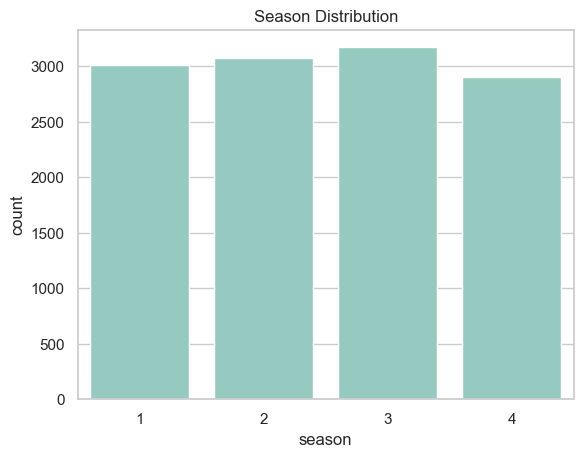

In [32]:
sns.countplot(x='season', data=df)
plt.title('Season Distribution')
plt.show()

In [33]:
display(df['season'].value_counts(),df['season'].value_counts() / len(df))

season
3    3169
2    3074
1    3009
4    2899
Name: count, dtype: int64

season
3    0.260802
2    0.252983
1    0.247634
4    0.238581
Name: count, dtype: float64

- 1. Musim Panas (3169): 26.0%
- 2. Musim Semi (3074): 25.2%
- 3. Musim Dingin (3023): 24.8%
- 4. Musim Gugur (2899): 23.8%

C:\Users\willy\AppData\Local\Temp\ipykernel_26048\168229269.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['count'])


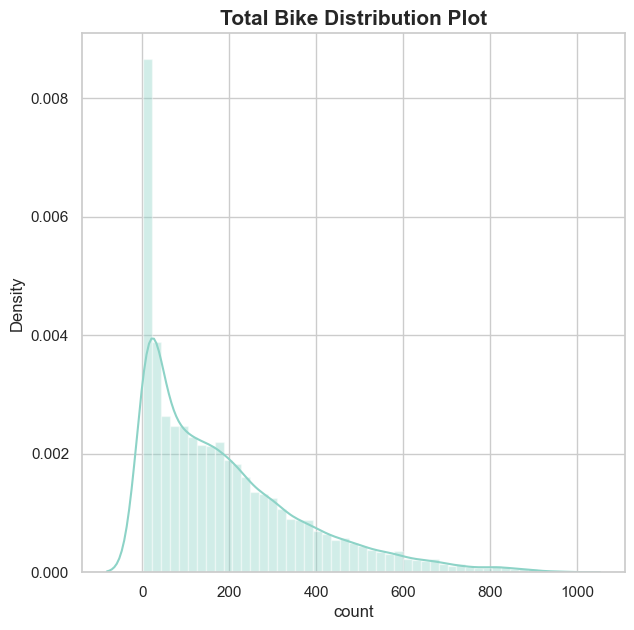

In [34]:
# Plot distribusi fitur 'cnt'
plt.figure(figsize=(7, 7))
sns.distplot(df['count'])
plt.title('Total Bike Distribution Plot', size=15, weight='bold');

Berdasarkan plot Jumlah Total Sepeda Sewaan di atas, terlihat bahwa terdapat **Right-Skewed Distribution**. Dengan kata lain, terdapat skewness kanan pada fitur "count".

### **Mengecek Outlier**

In [109]:
# Numerical Features
num_features = ['humidity', 'atemp', 'hour','count']
num_features

['humidity', 'atemp', 'hour', 'count']

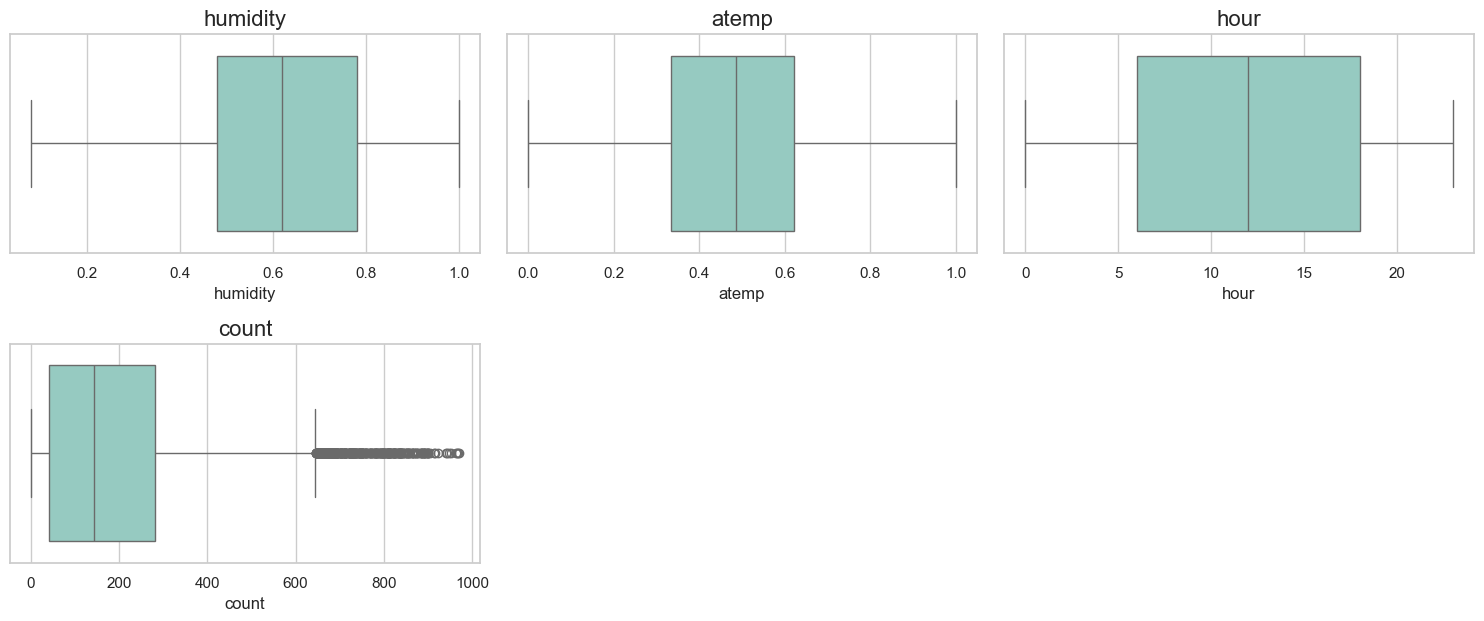

In [188]:
plt.figure(figsize=(15, 9), facecolor='white')
sns.set(style='whitegrid', palette='Set3')
plotnumber = 1

for feature in num_features:
    ax = plt.subplot(3,3, plotnumber)
    sns.boxplot(x=feature, data=df);
    plt.title(feature, fontsize=16)
    plt.tight_layout()
    plotnumber += 1

Dari grafik boxplot di atas, terlihat cukup banyak outliers pada feature `count`

In [56]:
# Mengecek outliers pada feature 'count'

q1 = df['count'].quantile(0.25)
q3 = df['count'].quantile(0.75)
iqr = q3 - q1
limit = iqr*1.5
print(f'IQR: {iqr}')

limit_bawah = q1 - limit
limit_atas = q3 + limit
print(f'limit_bawah: {limit_bawah}')
print(f'limit_atas: {limit_atas}')        

IQR: 242.0
limit_bawah: -323.0
limit_atas: 645.0


In [58]:
# Cek deskriptif statistik kolom count
df['count'].describe()

count    12151.000000
mean       189.457329
std        181.242898
min          1.000000
25%         40.000000
50%        142.000000
75%        282.000000
max        970.000000
Name: count, dtype: float64

Dari informasi di atas diketahui bahwa 75% data pada kolom `count` memiliki jumlah kurang dari 282, sedangkan jumlah maksimalnya adalah 970. Tentu terdapat skewness pada distribusinya, yaitu tail yang memanjang di sebelah kanan (positive skewness).

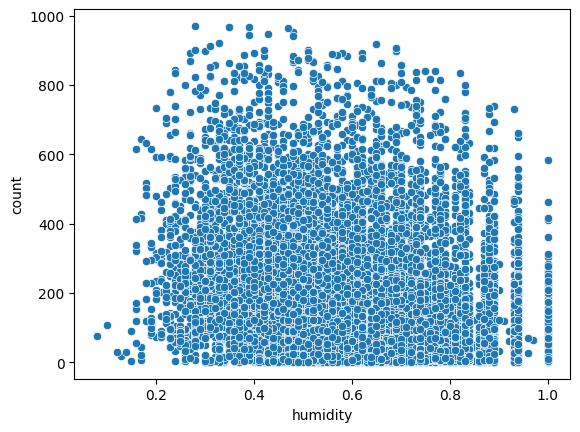

In [59]:
# count vs humidity
sns.scatterplot(x='humidity', y='count', data=df);

### **Mengecek Hubungan Antar Variabel**

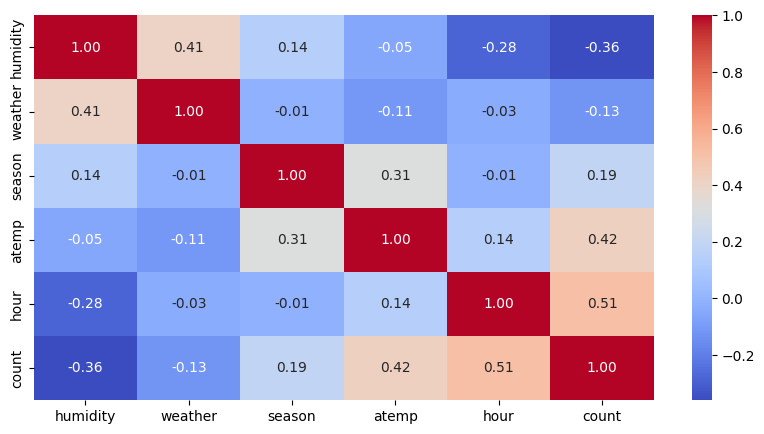

In [60]:
plt.figure(figsize=(10,5))
sns.heatmap(df.select_dtypes('number').corr(method='spearman'), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

In [61]:
# Check correlation to the target
df.select_dtypes(['int', 'float']).corr(method='spearman')['count']

humidity   -0.359965
weather    -0.125042
season      0.187314
atemp       0.421934
hour        0.513731
count       1.000000
Name: count, dtype: float64

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12151 entries, 0 to 12164
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   humidity  12151 non-null  float64 
 1   weather   12151 non-null  int64   
 2   holiday   12151 non-null  category
 3   season    12151 non-null  int64   
 4   atemp     12151 non-null  float64 
 5   hour      12151 non-null  int64   
 6   count     12151 non-null  int64   
 7   day       12151 non-null  object  
 8   month     12151 non-null  category
 9   year      12151 non-null  category
dtypes: category(3), float64(2), int64(4), object(1)
memory usage: 795.5+ KB


Setelah melalui tahap data cleansing, tersisa 12.151 baris data yang akan digunakan untuk pemodelan.

## **Define (X dan y) and Data Splitting**

In [64]:
# Memisahkan features dan target
X = df.drop('count', axis=1)  # Features (kolom selain 'count')
y = df['count']  # Target (kolom 'count')

# Splitting dataset dengan proporsi 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

# Mengecek bentuk data setelah splitting
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (9720, 9)
Shape of X_test: (2431, 9)
Shape of y_train: (9720,)
Shape of y_test: (2431,)


- X_train memiliki 9,720 baris (80% dari 12,151 baris) dan 9 kolom (fitur yang ada dalam dataset).
- X_test memiliki 2,431 baris (20% dari 12,151 baris) dan 9 kolom.
- y_train dan y_test adalah target (Count), dengan ukuran yang sesuai dengan X_train dan X_test.

## **Encoding**

Agar kita dapat menggunakan semua feature yang dipilih, maka feature-feature kategorikal perlu diubah menjadi feature numerikal. Kita dapat menggunakan `ColumnTransformer` untuk dapat mengubah tipe datanya, yang mana nanti dapat diaplikasikan pada pipeline model.

In [65]:
# Mengubah fitur kategorikal menjadi numerikal

transformer = ColumnTransformer([
    ('One Hot', OneHotEncoder(drop='first'), ['weather', 'season', 'year']),
    ('Binary', ce.BinaryEncoder(), ['day'])
], remainder='passthrough')

## **Choose a Benchmark Model**

In [93]:
# Menentukan algoritma yang akan digunakan
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=12)
rf = RandomForestRegressor(random_state=12)
gb = GradientBoostingRegressor(random_state=12)
xgb = XGBRegressor(random_state=12)

# Pemodelan dilakukan dalam skala logaritmik, namun kemudian di-inverse kembali untuk interpretasi
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_gb = TransformedTargetRegressor(gb, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

# Algoritma Candidates
models = [log_lr, log_knn, log_dt, log_rf, log_gb, log_xgb]

score_mae = []
score_mape = []
score_rmse = []
score_r2 = []

# Mencari algoritma terbaik berdasarkan nilai MAE
for model in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=8)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('model', model)
    ])

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    print(model_cv_mae, model)

    score_mae.append(model_cv_mae.mean())
    
    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    print(model_cv_mape, model)

    score_mape.append(model_cv_mape.mean())

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
    )

    print(model_cv_rmse, model)

    score_rmse.append(model_cv_rmse.mean())

    # R2
    model_cv_r2 = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='r2', 
        error_score='raise'
        )
    
    print(model_cv_r2, model)

    score_r2.append(model_cv_r2.mean())

[-105.99239274 -111.70439109 -106.82476031 -108.98826246 -107.44169897] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-1.2914628  -1.3689431  -1.46383669 -1.34876759 -1.44695347] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-160.3185355  -167.73213471 -162.35921915 -165.63392775 -163.18379217] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[0.18781719 0.16954958 0.20567113 0.2050148  0.20101803] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-39.22953458 -43.52922367 -42.05825795 -48.49300175 -46.24577874] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-0.384

In [94]:
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'Gradient Boosting', 'XGBoost Regressor'],
    'MAE': score_mae,
    'MAPE': score_mape,
    'RMSE': score_rmse,
    'R-squared': score_r2
})

,Model,MAE,MAPE,RMSE,R-squared
0,Linear Regression,-108.190301,-1.383993,-163.845522,0.193814
1,KNN Regressor,-43.911159,-0.424268,-70.615035,0.849954
2,DecisionTree Regressor,-45.717006,-0.504447,-79.477137,0.805186
3,RandomForest Regressor,-36.190341,-0.348452,-60.188641,0.888517
4,Gradient Boosting,-56.145347,-0.484851,-88.565835,0.764323
5,XGBoost Regressor,-29.607548,-0.276567,-48.164892,0.930039


Dari hasil di atas, diketahui bahwa model XGBoost menjadi model yang terbaik karena memiliki performa nilai MAE (29.60), MAPE (0.27), RMSE (48,16) dan R-squared (0.93) yang lebih baik dibandingkan model lainnya. Berikutnya kita akan melakukan prediksi pada Test Set dengan menggunakan benchmark model yaitu XGBoost Regressor. 

**Extreme Gradient Boosting (XGBoost)**

In [95]:

xgb = TransformedTargetRegressor(XGBRegressor(random_state=12), func=np.log, inverse_func=np.exp)

score_mae = []
score_mape = []
score_rmse = []
score_r2 = []

estimator = Pipeline([
        ('preprocessing', transformer),
        ('model', xgb)
        ])

estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_test)
score_mae.append(mean_absolute_error(y_test, y_pred))
score_mape.append(mean_absolute_percentage_error(y_test, y_pred))
score_rmse.append(root_mean_squared_error(y_test, y_pred))
score_r2.append(r2_score(y_test, y_pred))

score_before_tuning = pd.DataFrame({'MAE': score_mae, 'MAPE': score_mape, 'RMSE': score_rmse, 'R-squared': score_r2}, index=['XGB'])
score_before_tuning

,MAE,MAPE,RMSE,R-squared
XGB,27.514944,0.261316,46.073631,0.931379


**Hyperparameter Tuning (GridSearch**)

*Hyperparameter tuning* adalah langkah penting dalam membangun model machine learning untuk mencapai performa terbaik.

🎯 **Tujuan**: 
> Menemukan **kombinasi hyperparameter terbaik** yang **meminimalkan error**

💬 **Metode Hyperpatameter Tuning**
> - Menggunakan **Algoritma Grid Search**: metode *brute-force* yang membangun model untuk setiap kombinasi hyperparameter yang ditentukan dan kemudian mengevaluasinya.
> - Metode ini bisa memakan waktu dan sumber daya komputasi, tetapi metode ini menjamin menemukan hyperparameter optimal yang sesuai dengan rentang nilai yang ditentukan.

💬 **Langkah-langkah menggunakan Algoritma Grid Search untuk mencari hyperparameter terbaik**
> 1.  Menentukan nilai-nilai dari hyperparameter yang ingin dicoba
> 2.  Melakukan iterasi pembuatan model dan menghitung nilai evaluation-nya menggunakan *for-loop*
> 3.  Mendapatkan kombinasi hyperparameter optimal yang memiliki error terkecil atau accuracy terbesar

In [96]:
# Kedalaman pohon
max_depth = [2,3,4,5,6,7,8,9]

# Learning rate
learning_rate = [0.1, 0.001, 0.0001, 0.2, 0.3, 0.5, 0,7]

# Jumlah pohon
n_estimators = list(np.arange(200, 301, 20))

hyperparam_space_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators
}

xgb = XGBRegressor(random_state=12, verbosity=0)

# Membuat algorithm chains
estimator_xgb = Pipeline([
        ('preprocessing', transformer),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=12)
 
# Hyperparameter tuning(GridSearchCV)
gridsearch_xgb = GridSearchCV(
    estimator_xgb, 
    param_grid = hyperparam_space_xgb,
    cv = crossval, 
    scoring = 'neg_mean_absolute_error',
    n_jobs = -1,
)

In [97]:
# Fitting data training untuk mencari parameter terbaik
gridsearch_xgb.fit(X_train, y_train)

c:\Users\willy\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [ -63.87334366  -63.44239349  -63.11336517  -62.70497894  -62.29576416
  -61.98806686  -50.77691956  -50.19509125  -49.74493713  -49.32813492
  -48.83624115  -48.49598541  -40.22724152  -39.71678391  -39.08176193
  -38.7313179   -38.43759079  -38.13137894  -33.22766266  -33.03835983
  -32.77605553  -32.62700119  -32.4498558   -32.34841652  -30.1920414
  -30.06065178  -29.98941422  -29.87067604  -29.796241    -29.70013046
  -28.55561333  -28.48487396  -28.43387833  -28.39394417  -28.37468948
  -28.3616539   -27.79176445  -27.78819885  -27.7799263   -27.79003754
  -27.82964592  -27.83497124  -28.21816025  -28.19866562  -28.21196861
  -28.24149284  -28.24787064  -28.2621624  -131.86459045 -130.84412689
 -129.84875793 -128.87866058 -127.93057404 -127.00231018 -129.57523651
 -128.34574432 -127.14624176 -125.97840576 -12

GridSearchCV(cv=KFold(n_splits=5, random_state=12, shuffle=True),
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('One '
                                                                         'Hot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['weather',
                                                                          'season',
                                                                          'year']),
                                                                        ('Binary',
                                                                         BinaryEncoder(),
                                                                         ['day'])])),
                                       ('model',
                                        XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callbacks=None,
                                                     colsample_bylev...
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     random_state=12, ...))]),
             n_jobs=-1,
             param_grid={'model__learning_rate': [0.1, 0.001, 0.0001, 0.2, 0.3,
                                                  0.5, 0, 7],
                         'model__max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                         'model__n_estimators': [np.int64(200), np.int64(220),
                                                 np.int64(240), np.int64(260),
                                                 np.int64(280),
                                                 np.int64(300)]},
             scoring='neg_mean_absolute_error')

In [98]:
print('XGBoost')
print('Best_score:', gridsearch_xgb.best_score_)
print('Best_params:', gridsearch_xgb.best_params_)

XGBoost
Best_score: -27.779926300048828
Best_params: {'model__learning_rate': 0.1, 'model__max_depth': 8, 'model__n_estimators': np.int64(240)}


In [89]:
model = { 'XGB' : TransformedTargetRegressor(gridsearch_xgb.best_estimator_, func=np.log, inverse_func=np.exp)
}

xgb_tuning = TransformedTargetRegressor(gridsearch_xgb.best_estimator_, func=np.log, inverse_func=np.exp)

# Fitting model
xgb_tuning.fit(X_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)
rmse_xgb_tuning = root_mean_squared_error(y_test, y_pred_xgb_tuning)
r2_xgb_tuning = r2_score(y_test, y_pred_xgb_tuning)

score_after_tuning = pd.DataFrame({'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning, 'RMSE': rmse_xgb_tuning, 'R-squared': r2_xgb_tuning}, index=model.keys())
score_after_tuning

,MAE,MAPE,RMSE,R-squared
XGB,25.95574,0.258217,43.321209,0.939333


In [99]:
score_before_tuning

,MAE,MAPE,RMSE,R-squared
XGB,27.514944,0.261316,46.073631,0.931379


In [100]:
score_after_tuning

,MAE,MAPE,RMSE,R-squared
XGB,25.95574,0.258217,43.321209,0.939333


Terlihat bahwa model mengalami peningkatan performa, dimana nilai MAE,MAPE,RMSE menurun serta nilai R2 yang meningkat walaupun tidak signifikan.
- MAE, MAPE, RMSE dan R2 sebelum tuning: 27.51, 0.26, 46.07 dan 0.93
- MAE, MAPE, RMSE dan R2 setelah tuning: 25.95, 0.25, 43.43 dan 0.93

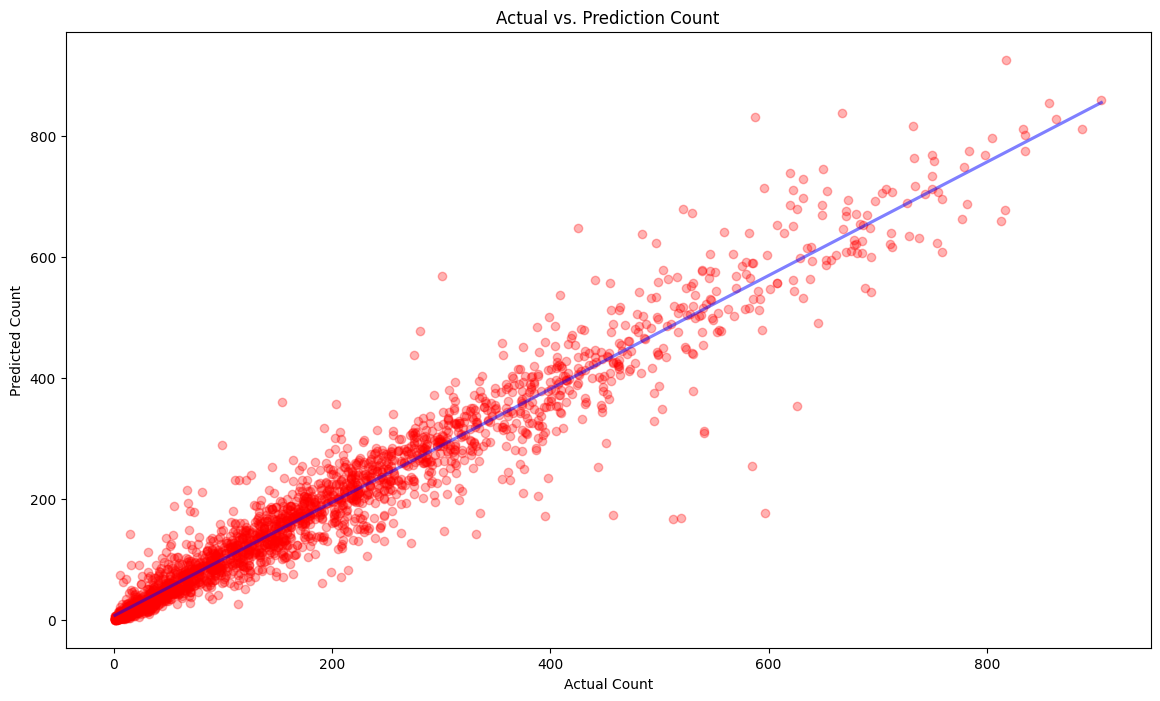

In [101]:
plt.figure(figsize=(14, 8))
sns.regplot(x=y_test, y=y_pred_xgb_tuning, ci=None, scatter_kws = {'color': 'red', 'alpha': 0.3}, line_kws = {'color': 'blue', 'alpha': 0.5}).set(title='Actual vs. Prediction Count', 
                                               xlabel='Actual Count', 
                                               ylabel='Predicted Count')
plt.show()

Dari grafik regplot di atas terlihat bahwa model masih mampu melakukan predikisi dengan cukup baik hingga mencapai nilai jumlah sepeda di kisaran 700 unit.

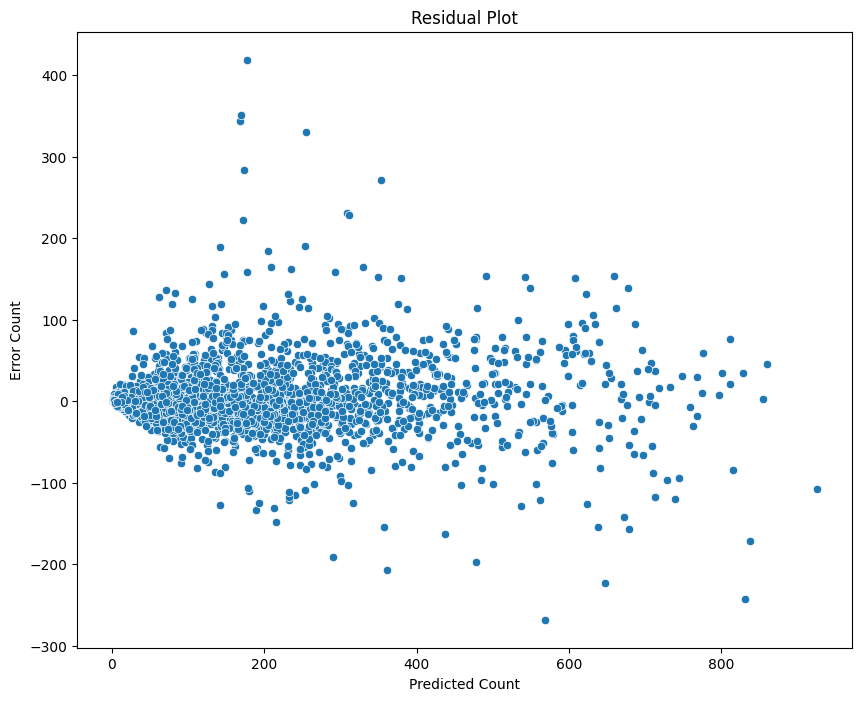

In [102]:
residual = y_test - y_pred_xgb_tuning

plt.figure(figsize=(10,8))
sns.scatterplot(x=y_pred_xgb_tuning, y=residual).set(title='Residual Plot', xlabel='Predicted Count', ylabel='Error Count')
plt.show()

In [103]:
dftarget = pd.DataFrame({'Actual Count': y_test, 'Predicted Count': y_pred_xgb_tuning})

df50 = dftarget[dftarget['Actual Count'] <=50]
df100 = dftarget[(dftarget['Actual Count']>50) & (dftarget['Actual Count']<=100)]
df150 = dftarget[(dftarget['Actual Count']>100) & (dftarget['Actual Count']<=150)]
df200 = dftarget[(dftarget['Actual Count']>150) & (dftarget['Actual Count']<=200)]
df250 = dftarget[(dftarget['Actual Count']>200) & (dftarget['Actual Count']<=250)]
df300 = dftarget[(dftarget['Actual Count']>250) & (dftarget['Actual Count']<=300)]
df350 = dftarget[(dftarget['Actual Count']>300) & (dftarget['Actual Count']<=350)]
df400 = dftarget[(dftarget['Actual Count']>350) & (dftarget['Actual Count']<=400)]
df450 = dftarget[(dftarget['Actual Count']>400) & (dftarget['Actual Count']<=450)]
df500 = dftarget[(dftarget['Actual Count']>450) & (dftarget['Actual Count']<=500)]
df550 = dftarget[(dftarget['Actual Count']>500) & (dftarget['Actual Count']<=550)]
df600 = dftarget[(dftarget['Actual Count']>550) & (dftarget['Actual Count']<=600)]
df600plus = dftarget[dftarget['Actual Count']>600]

target_range = [df50, df100, df150, df200, df250, df300, df350, df400, df450, df500, df550, df600, df600plus, dftarget]
index_range = ['<=50', '51-100', '101-150', '151-200', '201-250', '251-300', '301-350', '351-400', '401-450', '451-500', '501-550', '551-600', '>600', 'All Count Range (Max 953)']
mae = []
mape = []
for target in target_range:
    scoremae = mean_absolute_error(target['Actual Count'], target['Predicted Count'])
    scoremape = mean_absolute_percentage_error(target['Actual Count'], target['Predicted Count'])
    mae.append(scoremae)
    mape.append(scoremape)

range_metrics = pd.DataFrame({
              "Score MAE": mae,
              "Score MAPE": mape}, index=index_range)
range_metrics

,Score MAE,Score MAPE
<=50,7.497922,0.512258
51-100,19.381155,0.269640
101-150,22.930872,0.182791
151-200,26.754076,0.154962
201-250,32.665012,0.147180
251-300,29.617476,0.108355
301-350,35.437752,0.111006
351-400,50.481949,0.133534
401-450,42.014168,0.098997
451-500,50.919205,0.107601


Berdasarkan hasil pengelompokkan target tersebut terlihat bahwa untuk target dengan jumlah unit sepeda yang disewa sampai dengan 50 memiliki nilai MAPE yang cukup besar (~51%), walaupun pembagian data training dan testing untuk range tersebut sudah cukup baik, training (9720) dan testing (2431). Dari hasil pengelompokkan tersebut, bisa dilihat limitasi model dapat memprediksi dengan baik untuk jumlah unit sepeda di atas 50 unit, dengan hasil nilai evaluasi metrik yang masih cukup baik dan reasonable.

## **Feature Importances**

Untuk dapat mengetahui sebenarnya fitur apa saja yang sangat memengaruhi target (count), kita dapat mengeceknya melalui function feature_importances_.

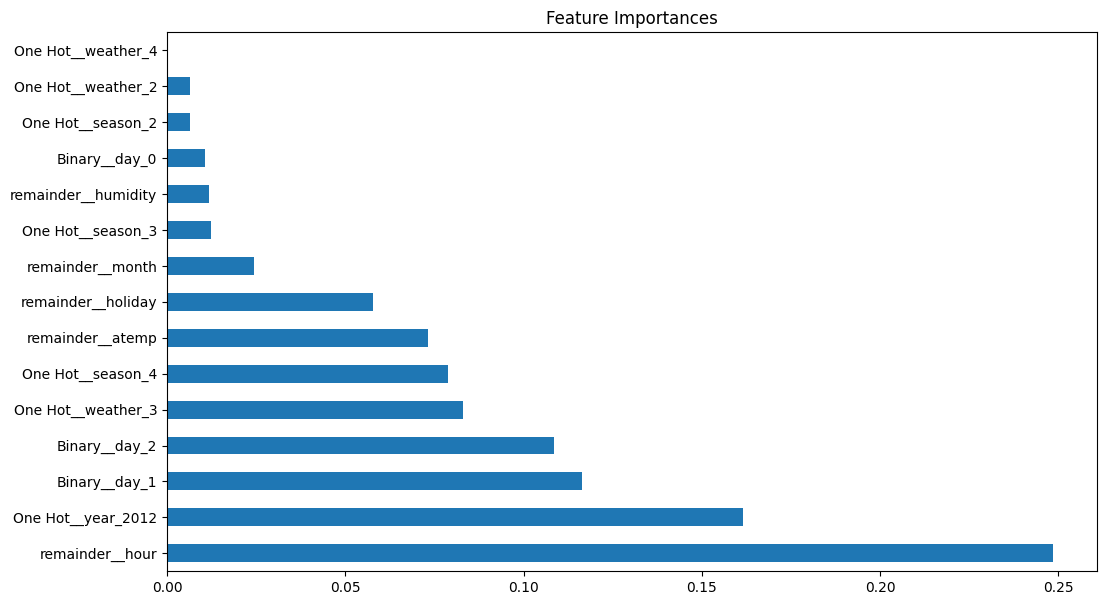

In [104]:
# Plot feature importances
xgb_tuning = gridsearch_xgb.best_estimator_

feature_imp = pd.Series(xgb_tuning['model'].feature_importances_, transformer.get_feature_names_out()).sort_values(ascending = False)
plt.figure(figsize=(12,7))
feature_imp.plot(kind='barh', title='Feature Importances')
plt.show()

## **Conclusion**

Berdasarkan dari pemodelan yang sudah dilakukan, feature `hour`, `year`, dan `day` menjadi feature yang paling berpengaruh terhadap `count`

Metrik evaluasi yang digunakan pada model ini adalah nilai MAE, MAPE, RMSE dan R2. Jika dilihat dari nilai MAPE yang dihasilkan oleh model setelah hyperparameter tuning (~25%),disimpulkan bahwa bila nanti model yang dibuat ini digunakan untuk memperkirakan jumlah unit sepeda yang harus disediakan pada rentang nilai yang sudah dilatih terhadap model (maksimal jumlah unit sepeda 970), maka perkiraan jumlahnya rata-rata akan meleset kurang lebih sebesar 25% dari jumlah yang seharusnya.

Namun dilihat dari hasil pengelompokkan berdasarkan rentang target dan visualisasi residual plot, bisa dilihat limitasi model dapat memprediksi dengan baik untuk jumlah unit sepeda di atas 51 unit, dengan hasil nilai evaluasi metrik yang masih cukup baik dan reasonable. Tidak menutup kemungkinan bahwa prediksi yang dihasilkan bisa meleset lebih jauh. Bias tersebut dihasilkan karena terbatasnya feature pada dataset yang berkaitan dengan target (jumlah unit sepeda yang disewa).

## **Recommendations**

Berikut adalah hal-hal yang dapat dilakukan untuk mengembangkan agar model bisa menjadi lebih baik:

1. Adanya penambahan data, dataset yang digunakan hanya dalam rentang 1 tahun (2011-2012). Apabila ada penambahan rentang tahun data dalam dataset, hal itu tentu dapat membantu dalam meningkatkan prediksi dari model.

2. Adanya penambahan feature yang lebih berkorelasi terhadap target (`count`), seperti lokasi peminjaman sepeda dengan jarak ruang publik (Mall, Perkantoran, Taman, Sekolah, dll). Jarak pengguna menggunakan jasa sepeda (berapa meter pengguna menggunakan sepeda tsb), waktu penyewa dalam menggunakan sepeda, jarak penyewa dari pengambilan awal sepeda sampai dengan penyewa menyelesaikan (tempat terakhir)

3. Model yang sudah dibuat ini sudah dapat digunakan untuk mengembangkan pembuatan model yang lain. Seperti memprediksi total unit sepeda yang disewa pada lokasi tertentu. Dimana nantinya dapat dianalisa sebagai pertimbangan untuk menambah tempat peminjaman sepeda di lokasi-lokasi yang strategis.

## **Save Model**

In [112]:
# Save model
import pickle

estimator = Pipeline([('preprocess', transformer), ('model', XGBRegressor())])
estimator.fit(X_train, y_train)

pickle.dump(estimator, open('Model_BikeSharing_XGB.pkl', 'wb'))

In [116]:
# Load model
# filename = 'Model_BikeSharing_XGB.pkl'
# loaded_model = pickle.load(open(filename, 'rb'))

In [117]:
# np.sqrt(mean_squared_error(y_test, loaded_model.predict(X_test)))